# Thompson Sampling

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv("Data/Ads_CTR_Optimisation.csv")
display(dataset.head(), dataset.shape)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


(10000, 10)

## Implementing Thompson Sampling

In [4]:
## need these to compute posteriors ect
import random 

#set up the lenths of the dataset so it can loop it
N = dataset.shape[0]
d = dataset.shape[1]

# initilising lists that will be used
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0, N):
    ## initilising with ad 1
    ad = 0
    
    # initilise the max chosen value at 0
    max_random = 0
    
    for i in range(0, d):
        
        # for each ad use the distributions to pull what we think the chance of the add being selected is
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        
        # choose the add that got the highest estimation of its click rate
        if random_beta > max_random:
            max_random = random_beta
            ad = i
            
    # update variables
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    
    # update rewards of each add as we do it
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
        
    total_reward = total_reward + reward

## Visualising the results - Histogram

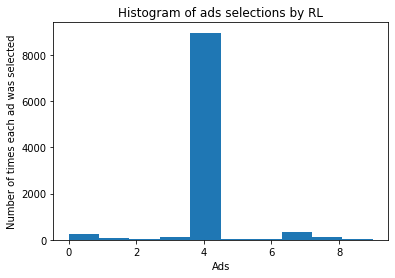

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections by RL')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

## Lets compare vs actual clicks on each add

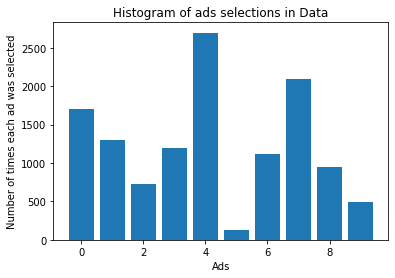

In [6]:
plt.bar(range(0, 10), dataset.sum(axis=0).values)
plt.title('Histogram of ads selections in Data')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

We can see it very quickly finds the best add similar to the UCB algorithm

## Finally lets see how fast it can find the best add

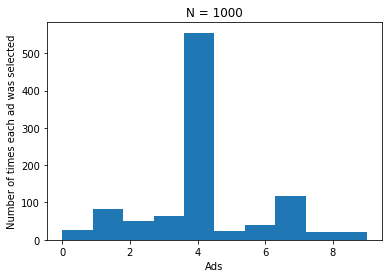

In [10]:
import random 

N = 1000
d = dataset.shape[1]

ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    
    max_random = 0
    
    for i in range(0, d):
        
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        
        if random_beta > max_random:
            max_random = random_beta
            ad = i
            
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
        
    total_reward = total_reward + reward
    
plt.hist(ads_selected)
plt.title('N = 1000')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

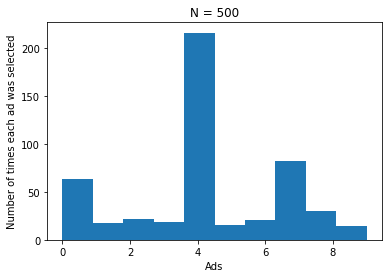

In [11]:
import random 

N = 500
d = dataset.shape[1]

ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    
    max_random = 0
    
    for i in range(0, d):
        
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        
        if random_beta > max_random:
            max_random = random_beta
            ad = i
            
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
        
    total_reward = total_reward + reward
    
plt.hist(ads_selected)
plt.title('N = 500')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

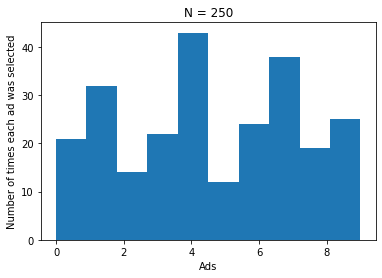

In [16]:
import random 

N = 250
d = dataset.shape[1]

ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    
    max_random = 0
    
    for i in range(0, d):
        
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        
        if random_beta > max_random:
            max_random = random_beta
            ad = i
            
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
        
    total_reward = total_reward + reward
    
plt.hist(ads_selected)
plt.title('N = 250')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

Looks likke the thopmson algorithm can get tot he correct add very quickly, as fast as 500 iterations for 10 ads

Something that should be noted however is as this is a probablistic algorithm it may not be good to go this low for N, as you amy get an incorrect assumption. You could also just do it for 500 sampokles two or three times for more certainty